# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя: Софья*
*Фамилия: Шведова*
*Электронная почта: shvedovass@mgpu.ru*



In [32]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm
from scipy import stats
from statsmodels. graphics.gofplots import qqplot
from matplotlib import pyplot

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

Загружаем файл

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


Смотрим файл

In [3]:
df = pd.read_csv('ad_viz_plotval_data.csv')
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6509,12/27/2023,AQS,490450004,3,15.5,ug/m3 LC,58,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6510,12/28/2023,AQS,490450004,3,17.6,ug/m3 LC,63,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6511,12/29/2023,AQS,490450004,3,19.3,ug/m3 LC,66,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780
6512,12/30/2023,AQS,490450004,3,26.6,ug/m3 LC,81,Erda,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,45,Tooele,40.600550,-112.355780


Смотрим информациию о типах данных и количестве нулевых значениц. Как можно увидеть, нулевых значений нет

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            6514 non-null   datetime64[ns]
 1   Source                          6514 non-null   object        
 2   Site ID                         6514 non-null   int64         
 3   POC                             6514 non-null   int64         
 4   Daily Mean PM2.5 Concentration  6514 non-null   float64       
 5   UNITS                           6514 non-null   object        
 6   DAILY_AQI_VALUE                 6514 non-null   int64         
 7   Site Name                       6514 non-null   object        
 8   DAILY_OBS_COUNT                 6514 non-null   int64         
 9   PERCENT_COMPLETE                6514 non-null   float64       
 10  AQS_PARAMETER_CODE              6514 non-null   int64         
 11  AQS_

Описательная статистика

In [5]:
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,6.514000e+03,6514.000000,6514.000000,6514.000000,6514.0,6514.0,6514.0,6514.0,6514.0,6514.000000,6514.000000,6514.000000
mean,4.903637e+08,2.171323,7.243921,28.064784,1.0,100.0,88101.0,41620.0,49.0,36.105312,40.685918,-111.987452
std,3.041880e+04,1.259437,6.279512,19.298589,0.0,0.0,0.0,0.0,0.0,3.135747,0.097821,0.143387
min,4.903520e+08,1.000000,-0.500000,0.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.496392,-112.355780
25%,4.903530e+08,1.000000,3.800000,16.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.600550,-112.036298
50%,4.903530e+08,2.000000,5.700000,24.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.709762,-111.931000
75%,4.903530e+08,3.000000,7.900000,33.000000,1.0,100.0,88101.0,41620.0,49.0,35.000000,40.777145,-111.894167
max,4.904500e+08,5.000000,52.600000,143.000000,1.0,100.0,88101.0,41620.0,49.0,45.000000,40.807897,-111.872222


Изменим тип данных Даты

In [8]:
df['Date']=df['Date'].astype('datetime64')

Проверим, нормально ли распределены данные по показателям PM2.5 Concentration и AQI или нет, используя для этого библиотеку pyplot

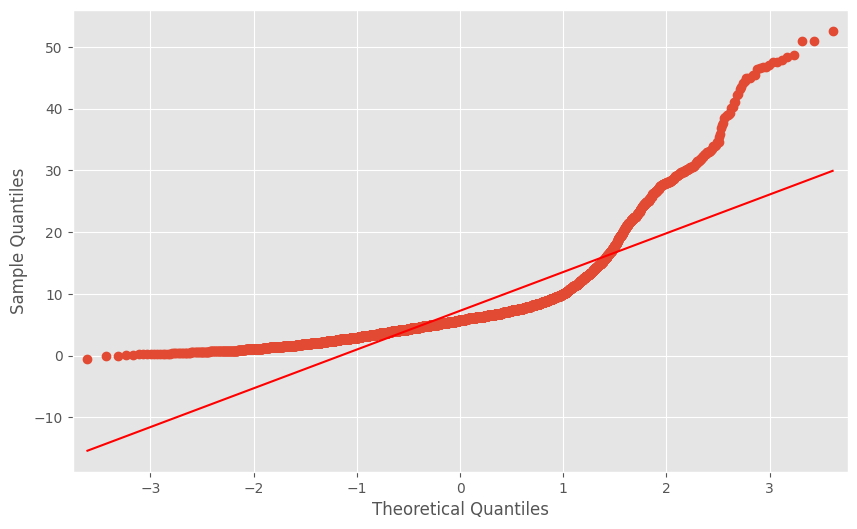

In [33]:
qqplot(df["Daily Mean PM2.5 Concentration"], line='s')
pyplot.show()

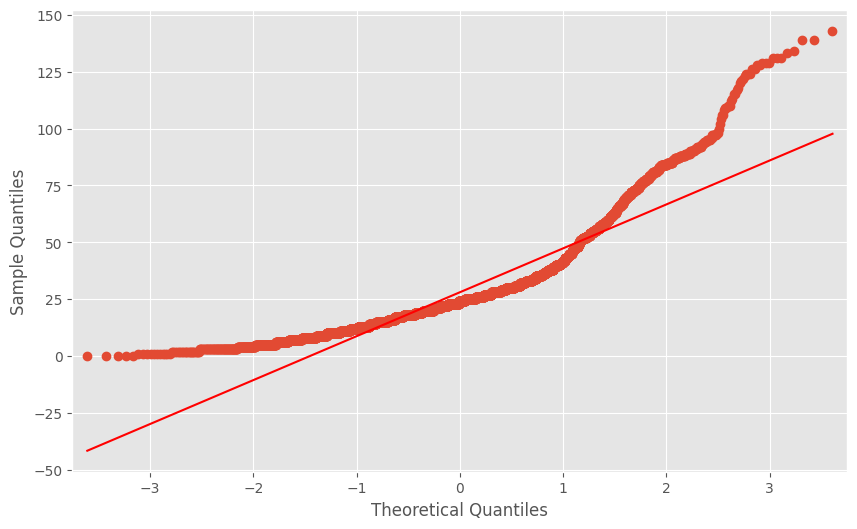

In [29]:
qqplot(df["DAILY_AQI_VALUE"], line='s')
pyplot.show()

Так как есть значительные выбросы по бокам, из чего можно сделать вывод, что представленные данные не имеют нормального распределения

### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


№1 Сделаем группировку данных по дате с вычислением средних значений

In [9]:
grouped_data = df.groupby('Date').mean().reset_index()

<ipython-input-9-47d250a2ddce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Date').mean().reset_index()


№1 Построим график, где можно будет изменять временной промежуток

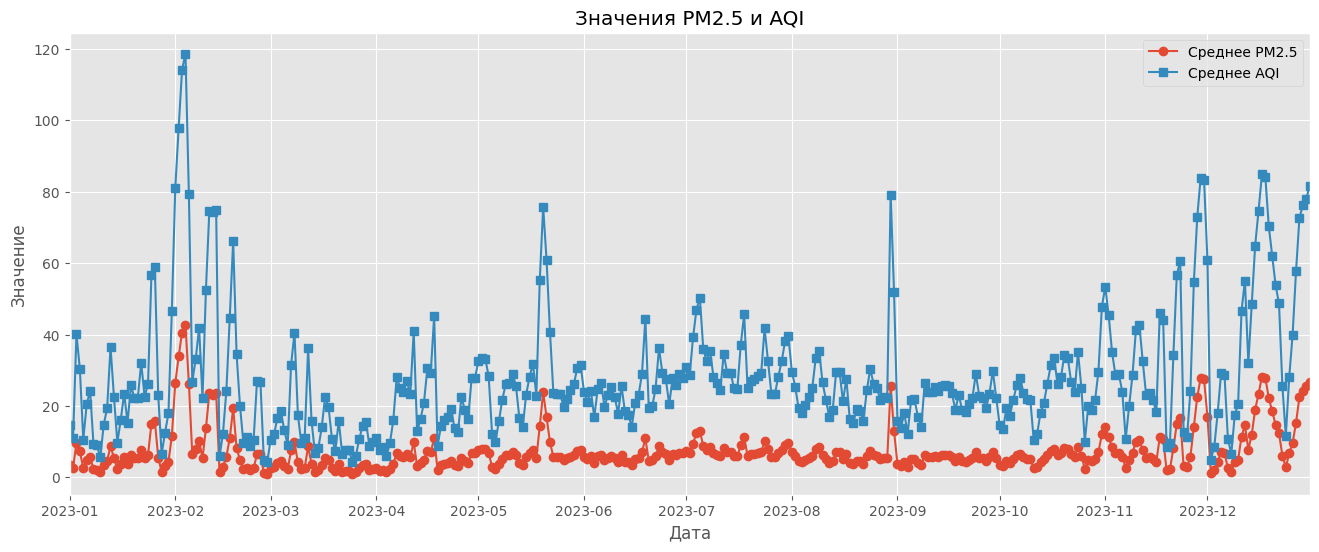

In [10]:
plt.figure(figsize=(16, 6))
plt.plot(grouped_data['Date'], grouped_data['Daily Mean PM2.5 Concentration'], marker='o', label='Среднее PM2.5')
plt.plot(grouped_data['Date'], grouped_data['DAILY_AQI_VALUE'], marker='s', label='Среднее AQI')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('Значения PM2.5 и AQI')
plt.legend()
plt.grid(True)
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')) # Можно изменять временной промежуток, чтобы узнавать среднее значение PM2.5 и AQI на конкретные даты
plt.show()

№2 Сделаем группировку по дате и индификатору участка; найдем среднее значение PM2,5 для каждой даты и участка и отфильтруем данные для двух участков

In [12]:
groupby_date2 = df.groupby(['Date', 'Site ID'])
pm = groupby_date2['Daily Mean PM2.5 Concentration'].mean().unstack() # Метод unstack() в pandas преобразует указанные уровни строк в уровни столбцов.
date = pm[[490352005, 490353015]]

№2 Построим график

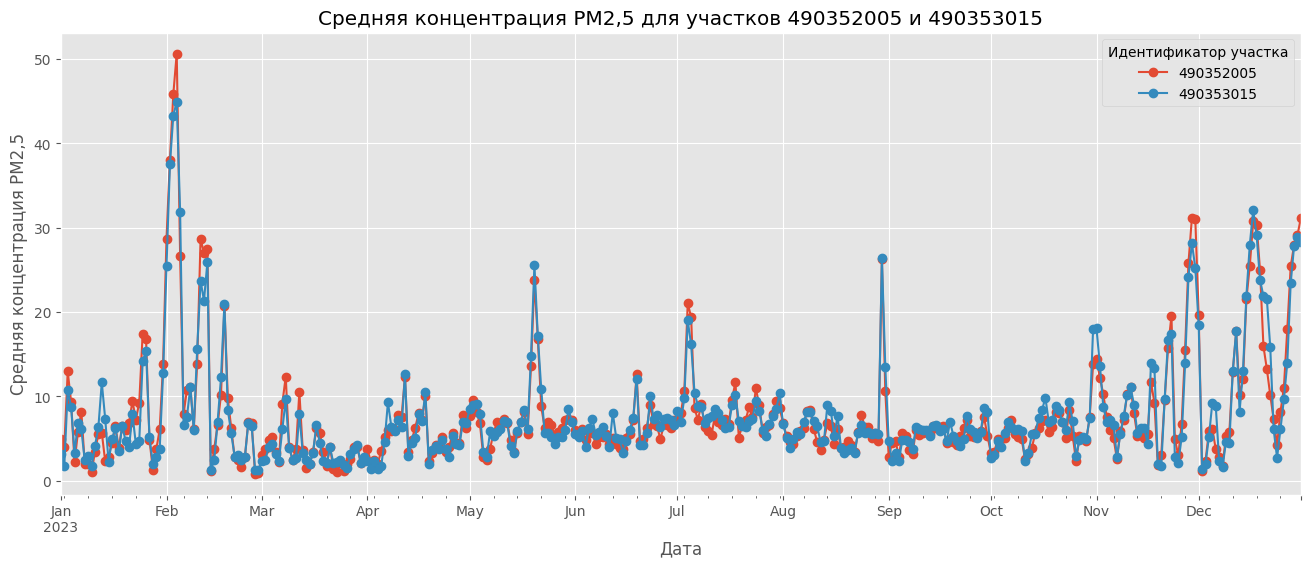

In [13]:
date.plot(marker='o', figsize=(16, 6))
plt.title('Средняя концентрация PM2,5 для участков 490352005 и 490353015')
plt.xlabel('Дата')
plt.ylabel('Средняя концентрация PM2,5')
plt.legend(title='Идентификатор участка')
plt.grid(True)
plt.xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31')) # Можно изменять временной промежуток, чтобы узнавать среднее значение PM2.5 и AQI на конкретные даты
plt.show()

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

Найдем среднее AQI по таблице: оно будет составлять 28,06

In [14]:
round((df.loc[:, 'DAILY_AQI_VALUE'].mean()),2)

28.06

По сайту https://www.iqair.com/ru/world-air-quality-ranking средний показатель  AQI будет составлять 20,28

Найдем скользящее среднее AQI, используя окно 2

In [15]:
df['rolling_mean'] = df['DAILY_AQI_VALUE'].rolling(2).mean()
print(df)

           Date Source    Site ID  POC  Daily Mean PM2.5 Concentration  \
0    2023-01-01    AQS  490352005    1                             4.6   
1    2023-01-02    AQS  490352005    1                             4.0   
2    2023-01-03    AQS  490352005    1                            12.5   
3    2023-01-04    AQS  490352005    1                             9.9   
4    2023-01-05    AQS  490352005    1                             2.2   
...         ...    ...        ...  ...                             ...   
6509 2023-12-27    AQS  490450004    3                            15.5   
6510 2023-12-28    AQS  490450004    3                            17.6   
6511 2023-12-29    AQS  490450004    3                            19.3   
6512 2023-12-30    AQS  490450004    3                            26.6   
6513 2023-12-31    AQS  490450004    3                            18.7   

         UNITS  DAILY_AQI_VALUE    Site Name  DAILY_OBS_COUNT  \
0     ug/m3 LC               19  Copper View  

Построим график, используя временной диапазон с 2023-04-12 до 2023-05-12

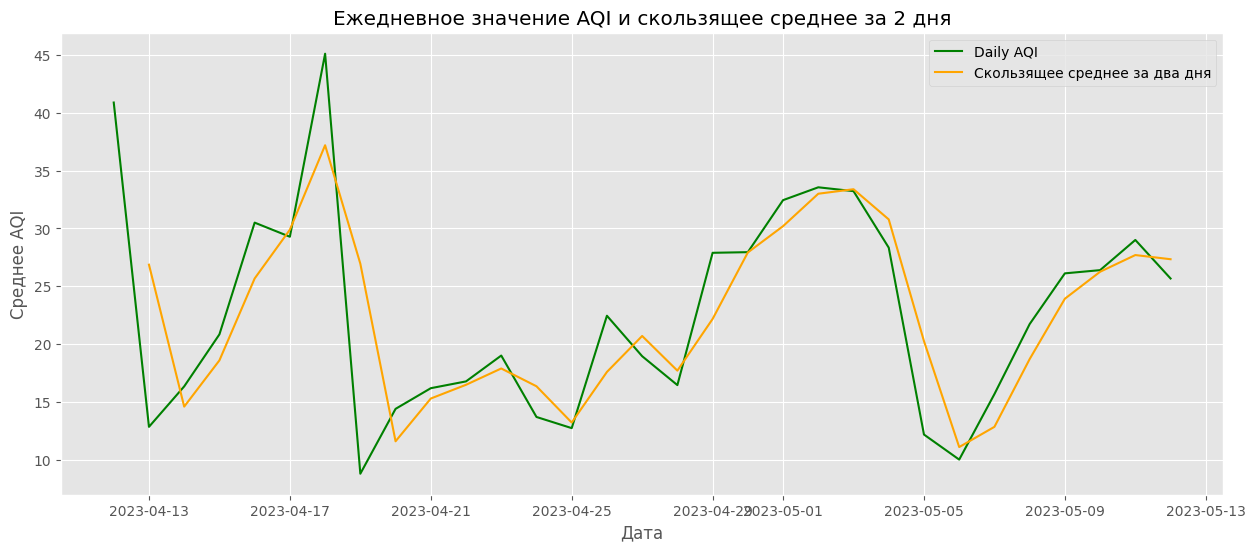

In [16]:
begin = '2023-04-12'
end = '2023-05-12'
df_s = df[(df['Date'] >= begin) & (df['Date'] <= end)]
df_m = df_s.groupby('Date')['DAILY_AQI_VALUE'].mean()

plt.figure(figsize=(15, 6))
plt.xlabel('Дата')
plt.ylabel('Среднее AQI')
plt.plot(df_m, label='Daily AQI', color='green')
rolling_window = df_m.rolling(window=2).mean()
plt.plot(rolling_window, label='Скользящее среднее за два дня', color='orange')
plt.title('Ежедневное значение AQI и скользящее среднее за 2 дня')
plt.legend()
plt.grid(True)
plt.show()

Можно сделать вывод, что чем меньше временной промежуток (в данном случае он составляет два дня), тем больше совпадает ежедневное значение AQI и скользящее среднее

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:** Н0: Logo A и Logo B одинаково хороши,
H1: Logo B лучше

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

In [26]:
print("Количество откликов для логотипа А (Pa): ", 800/3000)
print("Количество откликов для логотипа B (Pb): ", 1000/3000)
print("p= ", (3000/(3000+3000))*(800/3000)+(3000/(3000+3000))*(1000/3000))
print("q= ", 1-((3000/(3000+3000))*(800/3000)+(3000/(3000+3000))*(1000/3000)))
print("Двухпропорциональное Z-значение= ", ((800/3000)-(1000/3000))/pow(0.3*0.7*((1/3000)+(1/3000)),0.5))

Количество откликов для логотипа А (Pa):  0.26666666666666666
Количество откликов для логотипа B (Pb):  0.3333333333333333
p=  0.3
q=  0.7
Двухпропорциональное Z-значение=  -5.6343616981901095


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [27]:
print("pval = ", stats.norm.cdf(z))

pval =  8.785395076012362e-09


In [23]:
from statsmodels.stats.proportion import proportions_ztest
counts = [800, 1000]
sample_sizes = [3000, 3000]
z, pval = proportions_ztest(counts, sample_sizes,alternative='smaller')
print("Двухпропорциональное Z-значение = ", z)
print("pval = ", pval)

Двухпропорциональное Z-значение =  -5.6343616981901095
pval =  8.785395076012362e-09


P значение меньше, чем 0.05, значит взаимосвязи нет. Мы отвергаем нулевую гипотезу и заявляем, что Logo B лучше

